In [1]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import accrual
import math
from scipy.optimize import brentq, least_squares
from typing import Sequence, Union
import matplotlib.pyplot as plt
Number = Union[int, float]

ModuleNotFoundError: No module named 'accrual'

In [3]:
data = pd.read_excel('hw1_data/sofr_rates_input_020223.xlsx')
date_ajd = datetime.datetime(2023, 2, 2)
date_depart = datetime.datetime(2023, 2, 6)
data['mid_price'] = data['Ask']/2 + data['Bid']/2

In [4]:
data

,Term,Unit,Ticker,Bid,Ask,Spread,Bid Spr Val,Ask Spr Val,Final Bid Rate,Final Ask Rate,Rate Type,Daycount,Freq,mid_price
0,1,WK,USOSFR1Z,4.555175,4.566785,NaN,0,0,4.555175,4.566785,Swap Rates,ACT/360,1,4.560980
1,2,WK,USOSFR2Z,4.558952,4.572048,NaN,0,0,4.558952,4.572048,Swap Rates,ACT/360,1,4.565500
2,3,WK,USOSFR3Z,4.560732,4.573268,NaN,0,0,4.560732,4.573268,Swap Rates,ACT/360,1,4.567000
3,1,MO,USOSFRA,4.563580,4.570621,NaN,0,0,4.563580,4.570621,Swap Rates,ACT/360,1,4.567101
4,2,MO,USOSFRB,4.617931,4.629068,NaN,0,0,4.617931,4.629068,Swap Rates,ACT/360,1,4.623499
5,3,MO,USOSFRC,4.687098,4.697502,NaN,0,0,4.687098,4.697502,Swap Rates,ACT/360,1,4.692300
6,4,MO,USOSFRD,4.743958,4.755242,NaN,0,0,4.743958,4.755242,Swap Rates,ACT/360,1,4.749600
7,5,MO,USOSFRE,4.784925,4.797075,NaN,0,0,4.784925,4.797075,Swap Rates,ACT/360,1,4.791000
8,6,MO,USOSFRF,4.817964,4.825636,NaN,0,0,4.817964,4.825636,Swap Rates,ACT/360,1,4.821800
9,7,MO,USOSFRG,4.833484,4.845315,NaN,0,0,4.833484,4.845315,Swap Rates,ACT/360,1,4.839400


## Opt

In [5]:
opt = pd.read_excel('hw1_data/sofr_rates_output_020223.xlsx')
opt

,Date,Zero rate,Forward,DF
0,2023-02-06,NaN,4.829605,1.000000
1,2023-08-06,4.829605,4.689564,0.976335
2,2024-02-06,4.759009,3.803367,0.953525
3,2024-08-06,4.441044,3.037370,0.935612
4,2025-02-06,4.087725,2.707703,0.921395
...,...,...,...,...
96,2071-02-06,2.305973,1.062489,0.330343
97,2071-08-06,2.293267,1.062489,0.328607
98,2072-02-06,2.280613,1.062489,0.326851
99,2072-08-06,2.268350,1.062489,0.325124


# Question 7

In [ ]:
def calcul_fwd(start, end, fwd, delta_t):
    offset =  accrual.accrual_period_days(date_depart, start)
    N = accrual.accrual_period_days(start,end)
    i, integral, remaining = 0, 0, N
    while remaining > 0:
        t = max(min(remaining, delta_t[i]-offset), 0)
        offset -= min(offset, delta_t[i])
        remaining -= t
        integral += fwd[i]*t/360
        i += 1
    return 365/N*integral


def calcul_df(start, end, fwd, delta_t):
    offset =  accrual.accrual_period_days(date_depart, start)
    N = accrual.accrual_period_days(start,end)
    i, integral, remaining = 0, 0, N
    while remaining > 0:
        t = max(min(remaining, delta_t[i]-offset), 0)
        offset -= min(offset, delta_t[i])
        remaining -= t
        integral += fwd[i]*t/360
        i += 1
    return np.exp(-integral)

def solve_f(A, B, a, b, k):
    def g(f):
        return A*math.exp(f*a) - B*math.exp(f*b) - k

    # Choose a safe bracket: forwards are rarely below –20 % or above +20 %
    f_low, f_high = -0.20, 0.20
    # Expand the bracket until g(f_low)·g(f_high) < 0
    while g(f_low) * g(f_high) > 0:
        f_low -= 0.20
        f_high += 0.20

    return brentq(g, f_low, f_high) 

def solve_f_multi(A: Union[Number, Sequence[Number]],
                  a: Union[Number, Sequence[Number]],
                  B: Union[Number, Sequence[Number]],
                  b: Union[Number, Sequence[Number]],
                  k: Number,
                  f_low: float = -0.20,
                  f_high: float =  0.20) -> float:
    """
    Trouve f tel que  Σ A_j e^{a_j f}  −  Σ B_i e^{b_i f}  = k.

    - Si A, a, B ou b sont des scalaires, ils sont convertis en listes
      d’un élément pour garder la compatibilité avec l’ancienne `solve_f`.
    - `k` est un scalaire.
    """

    # --- cast scalaire → liste longue d’un élément -------------------------
    if not isinstance(A, (list, tuple)):  A = [A]
    if not isinstance(a, (list, tuple)):  a = [a]
    if not isinstance(B, (list, tuple)):  B = [B]
    if not isinstance(b, (list, tuple)):  b = [b]

    if len(A) != len(a) or len(B) != len(b):
        raise ValueError("Longueurs incohérentes entre A & a, ou B & b.")

    # --- fonction à annuler ------------------------------------------------
    def g(f: float) -> float:
        lhs = sum(Aj * math.exp(aj * f) for Aj, aj in zip(A, a))
        rhs = sum(Bi * math.exp(bi * f) for Bi, bi in zip(B, b))
        return lhs - rhs - k

    # --- élargit le bracket jusqu’à changer le signe -----------------------
    while g(f_low) * g(f_high) > 0:
        f_low  -= 0.20
        f_high += 0.20

    # --- Brent -------------------------------------------------------------
    return brentq(g, f_low, f_high)


In [8]:
fwd, spot, delta_t, int_fwd = [], [], [], []
for swap in data.iterrows(): # ✅
    if swap[1]['Unit'][0] == 'M' and swap[1]['Term']==18:
        a_date_1 = accrual.accrual_date(date_depart, 6, 'M')
        p_date_1 = accrual.payment_date(a_date_1)
        n_days_1 = accrual.accrual_period_days(date_depart,a_date_1)
        a_date_2 = accrual.accrual_date(date_depart, 18, 'M')
        p_date_2 = accrual.payment_date(a_date_2)
        n_days_2 = accrual.accrual_period_days(a_date_1,a_date_2)
        
        df_st_p1 = calcul_df(date_depart, p_date_1, fwd, delta_t)
        df_st_a1 = calcul_df(date_depart, a_date_1, fwd, delta_t)
        fixed_1 = swap[1]['mid_price']/100 * n_days_1/360 * df_st_p1
        floating_1 = (1/df_st_a1 - 1)*df_st_p1
    
        t1y = accrual.accrual_date(date_depart, 12, "M")
        df_st_1y = calcul_df(date_depart, t1y, fwd, delta_t)
        delta_t.append(accrual.accrual_period_days(date_depart,p_date_2)-sum(delta_t))
        A = df_st_a1
        B = (1 + swap[1]['mid_price']/100 * n_days_2/360)*df_st_1y  
        a = -accrual.accrual_period_days(a_date_2, p_date_2)/360
        b = -accrual.accrual_period_days(t1y, p_date_2)/360
        k = fixed_1 - floating_1
        fwd.append(solve_f(A,B,a,b,k))
    elif swap[1]['Unit'][0] != 'Y': # ✅
        a_date = accrual.accrual_date(date_depart, swap[1]['Term'], swap[1]['Unit'][0])
        n_days = accrual.accrual_period_days(date_depart,a_date)
        delta_t.append(n_days-sum(delta_t) if len(delta_t) > 0 else n_days) 
        fixed_payment = swap[1]['mid_price']/100 * n_days/360
        fwd.append((np.log(1+fixed_payment) - (int_fwd[-1] if len(int_fwd) > 0 else 0))*360/delta_t[-1])
        int_fwd.append(int_fwd[-1]+fwd[-1]*delta_t[-1]/360 if len(int_fwd)> 0 else fwd[-1]*delta_t[-1]/360)
    elif swap[1]['Unit'][0] == 'Y' and swap[1]['Term']==2: # ✅
        a_date_1 = accrual.accrual_date(date_depart, 1, 'Y')
        p_date_1 = accrual.payment_date(a_date_1)
        n_days_1 = accrual.accrual_period_days(date_depart,a_date_1)
        a_date_2 = accrual.accrual_date(a_date_1, 1, 'Y')
        p_date_2 = accrual.payment_date(a_date_2)
        n_days_2 = accrual.accrual_period_days(a_date_1,a_date_2)
        
        df_st_p1 = calcul_df(date_depart, p_date_1, fwd, delta_t)
        df_st_a1 = calcul_df(date_depart, a_date_1, fwd, delta_t)
        fixed_1 = swap[1]['mid_price']/100 * n_days_1/360 * df_st_p1
        floating_1 = (1/df_st_a1 - 1)*df_st_p1
    
        t18m = accrual.payment_date(accrual.accrual_date(date_depart, 18, "M"))
        df_st_18m = calcul_df(date_depart, t18m, fwd, delta_t)
        delta_t.append(accrual.accrual_period_days(date_depart,p_date_2)-sum(delta_t))
        A = df_st_a1
        B = (1 + swap[1]['mid_price']/100 * n_days_2/360)*df_st_18m  
        a = -accrual.accrual_period_days(a_date_2, p_date_2)/360
        b = -accrual.accrual_period_days(t18m, p_date_2)/360
        k = fixed_1 - floating_1
        fwd.append(solve_f(A,B,a,b,k))
    else:
        # print(swap[1]['Term'])
        if swap[1]['Term'] < 150:
            fixed_up_to_known, floating_up_to_known = 0, 0
            prec_date = date_depart
            for y in range(1, last_mat+1):
                a_date = accrual.accrual_date(date_depart, y, 'Y')
                p_date = accrual.payment_date(a_date)
                n_days = accrual.accrual_period_days(prec_date,a_date)
                # print(sum(delta_t), accrual.accrual_period_days(date_depart, p_date))
                df_st_py = calcul_df(date_depart, p_date, fwd, delta_t)
                df_st_acc = calcul_df(date_depart, a_date, fwd, delta_t)
                df_st_prec = calcul_df(date_depart, prec_date, fwd, delta_t)
                fixed_up_to_known += swap[1]['mid_price']/100 * n_days/360 * df_st_py
                floating_up_to_known += (df_st_prec/df_st_acc - 1) * df_st_py
                prec_date = a_date
            a_date = accrual.accrual_date(date_depart,last_mat+1,'Y')
            p_date = accrual.payment_date(a_date)
            k = fixed_up_to_known - floating_up_to_known
            p_prec_date = accrual.payment_date(prec_date)
            df_st_p_prec = calcul_df(date_depart, p_prec_date, fwd, delta_t)
            A = [calcul_df(date_depart, prec_date, fwd, delta_t)]
            B = [(1 + swap[1]['mid_price']/100 * accrual.accrual_period_days(prec_date,a_date)/360)*calcul_df(date_depart,p_prec_date, fwd, delta_t)]
            a = [-accrual.accrual_period_days(a_date, p_date)/360]
            b = [-accrual.accrual_period_days(accrual.payment_date(prec_date), p_date)/360]
            for y in range(last_mat+2, swap[1]['Term']+1):
                a_date_j_1 = accrual.accrual_date(date_depart, y-1, 'Y')
                a_date_j = accrual.accrual_date(date_depart, y, 'Y')
                a.append(-1/360 * (accrual.accrual_period_days(p_prec_date, accrual.payment_date(a_date_j)) - accrual.accrual_period_days(a_date_j_1, a_date_j)))
                A.append(df_st_p_prec)
                B.append((1 + swap[1]['mid_price']/100 * accrual.accrual_period_days(a_date_j_1,a_date_j)/360)*calcul_df(date_depart,p_prec_date, fwd, delta_t))
                p_date = accrual.payment_date(a_date_j)
                b.append(-1/360 * accrual.accrual_period_days(p_prec_date, p_date))
            delta_t.append(accrual.accrual_period_days(date_depart,p_date)-sum(delta_t))
            fwd.append(solve_f_multi(A,a,B,b,k))
            # fwd.append(solve_f(A[0],B[0],a[0],b[0], k))
    last_mat = swap[1]['Term']
df = np.exp(-1*np.array(int_fwd))

In [9]:
def calcul_fwd_6_mois(start, fwd, delta_t):
    offset =  accrual.accrual_period_days(date_depart, start)
    N = accrual.accrual_period_days(start,start + pd.DateOffset(months=6))
    i, integral, remaining = 0, 0, N
    while remaining > 0:
        t = max(min(remaining, delta_t[i]-offset), 0)
        offset -= min(offset, delta_t[i])
        remaining -= t
        integral += fwd[i]*t/360
        i += 1
        # print("periode :", i, "\noffset=",offset, 't=', t, "remaining=", remaining, "delta_t=", delta_t[i-1])
    return 365/N*integral

calcul_fwd_6_mois(pd.Timestamp(year=2072,month=2,day=6), fwd, delta_t)*100

np.float64(1.0624885558094788)

In [323]:
dates = [
    "2023-02-06", "2023-08-06",
    "2024-02-06", "2024-08-06",
    "2025-02-06", "2025-08-06",
    "2026-02-06", "2026-08-06",
    "2027-02-06", "2027-08-06",
    "2028-02-06", "2028-08-06",
    "2029-02-06", "2029-08-06",
    "2030-02-06", "2030-08-06",
    "2031-02-06", "2031-08-06",
    "2032-02-06", "2032-08-06",
    "2033-02-06", "2033-08-06",
    "2034-02-06", "2034-08-06",
    "2035-02-06", "2035-08-06",
    "2036-02-06", "2036-08-06",
    "2037-02-06", "2037-08-06",
    "2038-02-06", "2038-08-06",
    "2039-02-06", "2039-08-06",
    "2040-02-06", "2040-08-06",
    "2041-02-06", "2041-08-06",
    "2042-02-06", "2042-08-06",
]

rates = [100*calcul_fwd_6_mois(pd.Timestamp(date), fwd, delta_t) for date in dates]

In [324]:
rates

[np.float64(4.82960458257368),
 np.float64(4.689564191812817),
 np.float64(3.803367186764118),
 np.float64(3.037369931016185),
 np.float64(2.70770348241796),
 np.float64(2.7004436203538407),
 np.float64(2.6620781555480035),
 np.float64(2.661211139394199),
 np.float64(2.7006586005188797),
 np.float64(2.7015500685668945),
 np.float64(2.778607710705023),
 np.float64(2.7798991795676726),
 np.float64(2.832875224506584),
 np.float64(2.83346713562322),
 np.float64(2.886187184723263),
 np.float64(2.886776235551196),
 np.float64(2.983016992144926),
 np.float64(2.985191924497327),
 np.float64(3.0569489551978846),
 np.float64(3.0585614727417174),
 np.float64(3.1325378392166177),
 np.float64(3.1337846319100144),
 np.float64(3.1337846319100144),
 np.float64(3.1337846319100144),
 np.float64(3.179295581338388),
 np.float64(3.1798040835666384),
 np.float64(3.1798040835666384),
 np.float64(3.1798040835666384),
 np.float64(3.1798040835666375),
 np.float64(3.1798040835666384),
 np.float64(2.9970769513086

In [314]:
rates - opt['Forward'][:len(rates)]

0    -2.632028e-11
1     1.281730e-11
2    -3.588196e-11
3     1.618483e-11
4     1.796030e-11
5    -4.615952e-11
6     4.800338e-11
7    -5.801137e-12
8     1.887956e-11
9    -3.310552e-11
10    5.023093e-12
11   -3.232747e-11
12    6.584067e-12
13    2.322009e-11
14    2.326317e-11
15   -4.880407e-11
16    4.492584e-11
17   -2.672973e-12
18   -2.115641e-12
19    4.171730e-11
20    1.661782e-11
21    1.001466e-11
22    1.001466e-11
23    1.001466e-11
24    3.838796e-11
25   -3.336176e-11
26   -3.336176e-11
27   -3.336176e-11
28   -3.336265e-11
29   -3.336176e-11
30    8.637091e-12
31   -9.058088e-12
32   -9.057644e-12
33   -9.058088e-12
34   -9.058088e-12
35   -9.058088e-12
36   -9.057644e-12
37   -9.058088e-12
38   -9.057644e-12
39   -9.058088e-12
Name: Forward, dtype: float64

In [10]:
def calcul_fwd(start, end, fwd, delta_t):
    offset =  accrual.accrual_period_days(date_depart, start)
    N = accrual.accrual_period_days(start,end)
    i, integral, remaining = 0, 0, N
    while remaining > 0:
        t = max(min(remaining, delta_t[i]-offset), 0)
        offset -= min(offset, delta_t[i])
        remaining -= t
        integral += fwd[i]*t/360
        i += 1
    return 365/N*integral


def calcul_df(start, end, fwd, delta_t):
    offset =  accrual.accrual_period_days(date_depart, start)
    N = accrual.accrual_period_days(start,end)
    i, integral, remaining = 0, 0, N
    while remaining > 0:
        t = max(min(remaining, delta_t[i]-offset), 0)
        offset -= min(offset, delta_t[i])
        remaining -= t
        integral += fwd[i]*t/360
        i += 1
    return np.exp(-integral)

def calcul_zero_rates(date, fwd, delta_t):
    N = accrual.accrual_period_days(date_depart, date)
    i, integral, remaining = 0, 0, N
    while remaining > 0:
        t = min(remaining, delta_t[i])
        remaining -= t
        integral += fwd[i]*t/360
        i += 1
    return 365/N*integral

calcul_zero_rates(pd.Timestamp(year=2025,month=2,day=6),fwd, delta_t)

np.float64(0.04087725220297458)

In [ ]:
results = []

for i, date_str in enumerate(opt['Date']):
    date = pd.to_datetime(date_str)
    
    # (a) discount factor
    my_df = calcul_df(date_depart, date, fwd, delta_t)
    
    # (b) zero rate
    if date != date_depart:
        my_zero = calcul_zero_rates(date, fwd, delta_t)
    else:
        my_zero = np.nan
    
    # (c) Bloomberg zero rate
    bloomberg_zero = opt.loc[i, 'Zero rate']
    
    # (d) forward 6m (entre date et date+6m)
    if i < len(opt) - 1:
        next_date = pd.to_datetime(opt.loc[i+1, 'Date'])
        my_fwd = calcul_fwd(date, next_date, fwd, delta_t)
        bloomberg_fwd = opt.loc[i, 'Forward']
    else:
        my_fwd = np.nan
        bloomberg_fwd = np.nan

    # (e) Différences
    diff_zero = my_zero*100 - bloomberg_zero if pd.notnull(bloomberg_zero) else np.nan
    diff_fwd = my_fwd*100 - bloomberg_fwd if pd.notnull(bloomberg_fwd) else np.nan

    results.append({
        'Date': date_str,
        'My Discount Factor': my_df,
        'My Zero Rate': my_zero*100,
        'Bloomberg Zero Rate': bloomberg_zero,
        'My Forward 6M': my_fwd*100,
        'Bloomberg Forward 6M': bloomberg_fwd,
        'Diff Zero Rate': diff_zero,
        'Diff Forward 6M': diff_fwd
    })

# Table finale
results_df = pd.DataFrame(results)

# Pour affichage
pd.set_option('display.max_rows', 100)
print(results_df.tail(15))

          Date  My Discount Factor  My Zero Rate  Bloomberg Zero Rate  \
86  2066-02-06            0.348376      2.450542             2.450542   
87  2066-08-06            0.346546      2.434728             2.434728   
88  2067-02-06            0.344695      2.419017             2.419017   
89  2067-08-06            0.342883      2.403909             2.403909   
90  2068-02-06            0.341052      2.388892             2.388892   
91  2068-08-06            0.339250      2.374365             2.374365   
92  2069-02-06            0.337437      2.359999             2.359999   
93  2069-08-06            0.335664      2.346171             2.346171   
94  2070-02-06            0.333871      2.332412             2.332412   
95  2070-08-06            0.332117      2.319162             2.319162   
96  2071-02-06            0.330343      2.305973             2.305973   
97  2071-08-06            0.328607      2.293267             2.293267   
98  2072-02-06            0.326851      2.280613   

# Question 8

In [81]:
# def z_ns(beta, T):
#     b0, b1, b2, lam = beta
#     x = (1-np.exp(-lam*T))/(lam*T)
#     return b0 + b1*x + b2*(x - np.exp(-lam*T))

# def df(beta, T):
#     return np.exp(-z_ns(beta, T)*T) if T>0 else 1

def z_ns(beta, T):
    """
    Nelson-Siegel à 5 paramètres :
        beta = (β0, β1, β2, β3, λ)
        T    = array-like de maturités en années (ACT/365)
    Retourne le vecteur des zéros continus.
    """
    β0, β1, β2, β3, λ = beta
    T = np.asarray(T, dtype=float)

    # évite la division 0/0 pour T=0
    with np.errstate(divide='ignore', invalid='ignore'):
        x  = np.where(T == 0.0, 1.0, (1.0 - np.exp(-λ*T)) / (λ*T))
        z  = (β0
              + β1 * x
              + β2 * (x - np.exp(-λ*T))
              + β3 * np.exp(-λ*T))

    return z

def df(beta, T):
    T = np.asarray(T, dtype=float)
    return np.exp(-z_ns(beta, T) * T)

In [82]:
def swap_price(beta):
    prices = []
    for _, swap in data.iterrows():
        if swap['Unit'] == 'MO' and swap['Term'] == 18:
            a_date_1 = accrual.accrual_date(date_depart,6,'M')
            a_date_2 = accrual.accrual_date(date_depart,18,'M')
            p_date_1 = accrual.payment_date(a_date_1)
            p_date_2 = accrual.payment_date(a_date_2)
            n_days_a1 = accrual.accrual_period_days(date_depart, a_date_1)/360
            n_days_a2 = accrual.accrual_period_days(date_depart, a_date_2)/360
            n_days_p1 = accrual.accrual_period_days(date_depart, p_date_1)/360
            n_days_p2 = accrual.accrual_period_days(date_depart, p_date_2)/360
            pv_floating_leg = (1/df(beta, n_days_a1) - 1)*df(beta, n_days_p1) + (df(beta, n_days_a1)/df(beta, n_days_a2) - 1)*df(beta, n_days_p2)
            prices.append(pv_floating_leg/(n_days_a1*df(beta, n_days_p1) + (n_days_a2-n_days_a1)*df(beta, n_days_p2)))
        elif swap['Unit'] != 'YR': 
            a_date = accrual.accrual_date(date_depart,swap['Term'], swap['Unit'][0])
            n_days_a = accrual.accrual_period_days(date_depart, a_date)
            prices.append((1/df(beta, n_days_a/360)-1)*360/n_days_a)
        elif swap['Unit'] == 'YR':
            prec_date = date_depart
            pv_floating_leg, denom = 0, 0
            for y in range(1,swap["Term"]+1):
                a_date = accrual.accrual_date(date_depart, y, 'Y')
                p_date = accrual.payment_date(a_date)
                n_days_a = accrual.accrual_period_days(date_depart, a_date)/360
                n_days_prec = accrual.accrual_period_days(date_depart, prec_date)/360
                n_days_p = accrual.accrual_period_days(date_depart, p_date)/360
                pv_floating_leg += (df(beta, n_days_prec)/df(beta, n_days_a) - 1)*df(beta, n_days_p)
                denom += (n_days_a - n_days_prec)*df(beta, n_days_p)
                prec_date = a_date 
            prices.append(pv_floating_leg/denom)
    return prices

def swap_price_residuals(beta):
    model_prices = swap_price(beta)          # array de prix théoriques
    market = data["mid_price"].to_numpy() / 100
    # ------------- résidu pour chaque swap --------------------
    return model_prices - market  

In [83]:
beta0 = np.array([0.03, -0.02, 0.01, 0.02, 0.5])
fit = least_squares(swap_price_residuals, beta0, 
                    bounds=([-np.inf,-np.inf,-np.inf, -np.inf,1e-4],
                    [ np.inf, np.inf, np.inf, np.inf,5.0]))

In [84]:
beta_hat = fit.x
print(beta_hat)
swap_price_residuals(beta_hat)

[ 0.02672826  3.53384438 -3.47848427 -3.51606469  1.7854095 ]


array([-7.49956351e-04, -4.19298415e-04, -1.70057511e-04,  1.18881336e-04,
        6.21568837e-04,  7.31368749e-04,  6.09794449e-04,  4.90233194e-04,
        3.19040759e-04,  1.36349903e-04, -8.84884031e-05, -3.32276909e-04,
       -5.29810353e-04, -6.75543913e-04, -8.18215232e-04, -5.27655427e-04,
        2.63052879e-04,  9.34961711e-04,  9.55531807e-04,  8.14902909e-04,
        5.83455133e-04,  3.43625931e-04,  1.01723746e-04, -1.84898151e-04,
       -4.81330089e-04, -1.03261650e-03, -1.66205568e-03, -1.91259840e-03,
       -1.29635506e-03, -5.48953781e-04,  1.21972543e-03,  3.19824919e-03])

In [85]:
results = []

for i, date_str in enumerate(opt['Date']):
    date = pd.to_datetime(date_str)
    N = (date - date_depart).days
    if N == 0:
        my_df = 1.0
        my_zero = np.nan  
    else:
        my_zero = z_ns(beta_hat, N/360) 
        my_df = df(beta_hat, N/360)
    bloomberg_zero = opt.loc[i, 'Zero rate']
    
    results.append({
        'Date': date_str,
        'My Discount Factor': my_df,
        'My Zero Rate': my_zero*100,
        'Bloomberg Zero Rate': bloomberg_zero
    })

# DataFrame résultat
results_df = pd.DataFrame(results)
print(results_df.head(15))

         Date  My Discount Factor  My Zero Rate  Bloomberg Zero Rate
0  2023-02-06            1.000000           NaN                  NaN
1  2023-08-06            0.976179      4.795245             4.829605
2  2024-02-06            0.954279      4.615767             4.759009
3  2024-08-06            0.936343      4.328765             4.441044
4  2025-02-06            0.920884      4.059055             4.087725
5  2025-08-06            0.907240      3.842700             3.813839
6  2026-02-06            0.894272      3.670483             3.626919
7  2026-08-06            0.882033      3.538717             3.490164
8  2027-02-06            0.869925      3.433633             3.385765
9  2027-08-06            0.858251      3.351348             3.310244
10 2028-02-06            0.846578      3.283625             3.248908
11 2028-08-06            0.835203      3.228524             3.206281
12 2029-02-06            0.823866      3.181983             3.170490
13 2029-08-06            0.812866 

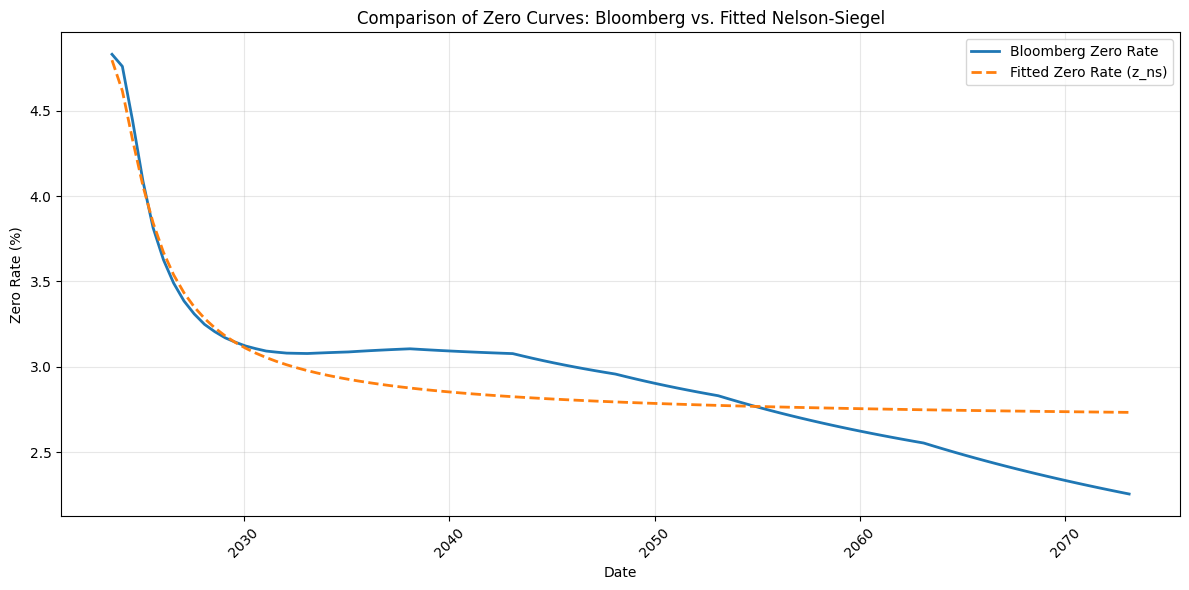

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(results_df['Date'], results_df['Bloomberg Zero Rate'], label='Bloomberg Zero Rate', linewidth=2)
plt.plot(results_df['Date'], results_df['My Zero Rate'], label='Fitted Zero Rate (z_ns)', linestyle='--', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Zero Rate (%)')
plt.title('Comparison of Zero Curves: Bloomberg vs. Fitted Nelson-Siegel')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Question 9

In [ ]:
def z_nss(beta, T):
    """
    T : scalaire ou array-like de maturités en années (ACT/365)
    beta = (β0, β1, β2, β3, τ1, τ2)
    retourne le(s) zero rate(s) continu(s) NSS.
    """
    β0, β1, β2, β3, τ1, τ2 = beta
    T = np.asarray(T, dtype=float)

    # x1, x2 : noyaux Nelson-Siegel
    with np.errstate(divide='ignore', invalid='ignore'):
        x1 = np.where(T == 0.0, 1.0, (1.0 - np.exp(-T/τ1)) / (T/τ1))
        x2 = x1 - np.exp(-T/τ1)
        # x3 : noyau Svensson
        x3 = np.where(T == 0.0, 0.0, (1.0 - np.exp(-T/τ2)) / (T/τ2) - np.exp(-T/τ2))

    return β0 + β1*x1 + β2*x2 + β3*x3


def df_nss(beta, T):
    """
    Discount factor continu dérivé de z_nss.
    """
    T = np.asarray(T, dtype=float)
    return np.exp(-z_nss(beta, T) * T)

In [ ]:
def swap_price_svenson(beta):
    prices = []
    for _, swap in data.iterrows():
        if swap['Unit'] == 'MO' and swap['Term'] == 18:
            a_date_1 = accrual.accrual_date(date_depart,6,'M')
            a_date_2 = accrual.accrual_date(date_depart,18,'M')
            p_date_1 = accrual.payment_date(a_date_1)
            p_date_2 = accrual.payment_date(a_date_2)
            n_days_a1 = accrual.accrual_period_days(date_depart, a_date_1)/360
            n_days_a2 = accrual.accrual_period_days(date_depart, a_date_2)/360
            n_days_p1 = accrual.accrual_period_days(date_depart, p_date_1)/360
            n_days_p2 = accrual.accrual_period_days(date_depart, p_date_2)/360
            pv_floating_leg = (1/df_nss(beta, n_days_a1) - 1)*df_nss(beta, n_days_p1) + (df_nss(beta, n_days_a1)/df_nss(beta, n_days_a2) - 1)*df_nss(beta, n_days_p2)
            prices.append(pv_floating_leg/(n_days_a1*df_nss(beta, n_days_p1) + (n_days_a2-n_days_a1)*df_nss(beta, n_days_p2)))
        elif swap['Unit'] != 'YR': 
            a_date = accrual.accrual_date(date_depart,swap['Term'], swap['Unit'][0])
            n_days_a = accrual.accrual_period_days(date_depart, a_date)
            prices.append((1/df_nss(beta, n_days_a/360)-1)*360/n_days_a)
        elif swap['Unit'] == 'YR':
            prec_date = date_depart
            pv_floating_leg, denom = 0, 0
            for y in range(1,swap["Term"]+1):
                a_date = accrual.accrual_date(date_depart, y, 'Y')
                p_date = accrual.payment_date(a_date)
                n_days_a = accrual.accrual_period_days(date_depart, a_date)/360
                n_days_prec = accrual.accrual_period_days(date_depart, prec_date)/360
                n_days_p = accrual.accrual_period_days(date_depart, p_date)/360
                pv_floating_leg += (df_nss(beta, n_days_prec)/df_nss(beta, n_days_a) - 1)*df_nss(beta, n_days_p)
                denom += (n_days_a - n_days_prec)*df_nss(beta, n_days_p)
                prec_date = a_date 
            prices.append(pv_floating_leg/denom)
    return prices

def swap_price_residuals_svenson(beta):
    model_prices = swap_price_svenson(beta)          # array de prix théoriques
    market = data["mid_price"].to_numpy() / 100
    # ------------- résidu pour chaque swap --------------------
    return model_prices - market  

In [ ]:
beta0 = [0.02, -0.03, 0.02, 0.01, 1.0, 4.0]
fit = least_squares(swap_price_residuals_svenson, beta0, 
                    bounds=([-np.inf,-np.inf,-np.inf, -np.inf,1e-5, 1e-5],
                    [ np.inf, np.inf, np.inf, np.inf,5.0, 5.0]))

In [ ]:
beta_hat = fit.x
print(beta_hat)
swap_price_residuals_svenson(beta_hat)

[0.02499292 0.01941315 0.03921836 0.00705498 0.53689854 5.        ]


array([-8.24631741e-04, -4.66078371e-04, -1.98016574e-04,  1.10741035e-04,
        6.76884956e-04,  8.19144160e-04,  7.04156933e-04,  5.76247761e-04,
        3.83868153e-04,  1.73788078e-04, -8.27229440e-05, -3.61351535e-04,
       -5.92892804e-04, -7.74850053e-04, -9.47408012e-04, -7.70677177e-04,
        1.12850358e-05,  8.30251709e-04,  1.03478493e-03,  1.03945158e-03,
        9.07673402e-04,  7.27716351e-04,  5.14182448e-04,  2.31826392e-04,
       -7.84951420e-05, -6.93169215e-04, -1.46242554e-03, -1.96076754e-03,
       -1.55429162e-03, -9.69401341e-04,  5.81172273e-04,  2.42794232e-03])

In [ ]:
aresults = []

for i, date_str in enumerate(opt['Date']):
    date = pd.to_datetime(date_str)
    N = (date - date_depart).days
    if N == 0:
        my_df = 1.0
        my_zero = np.nan  
    else:
        my_zero = z_nss(beta_hat, N/360) 
        my_df = df_nss(beta_hat, N/360)
    bloomberg_zero = opt.loc[i, 'Zero rate']
    
    results.append({
        'Date': date_str,
        'My Discount Factor': my_df,
        'My Zero Rate': my_zero*100,
        'Bloomberg Zero Rate': bloomberg_zero
    })

# DataFrame résultat
results_df = pd.DataFrame(results)
print(results_df.head(15))

         Date  My Discount Factor  My Zero Rate  Bloomberg Zero Rate
0  2023-02-06            1.000000           NaN                  NaN
1  2023-08-06            0.976147      4.801652             4.829605
2  2024-02-06            0.954399      4.603438             4.759009
3  2024-08-06            0.936680      4.305129             4.441044
4  2025-02-06            0.921339      4.034716             4.087725
5  2025-08-06            0.907665      3.824206             3.813839
6  2026-02-06            0.894534      3.660844             3.626919
7  2026-08-06            0.882041      3.538436             3.490164
8  2027-02-06            0.869617      3.442358             3.385765
9  2027-08-06            0.857602      3.367934             3.310244
10 2028-02-06            0.845574      3.307015             3.248908
11 2028-08-06            0.833857      3.257461             3.206281
12 2029-02-06            0.822191      3.215401             3.170490
13 2029-08-06            0.810896 

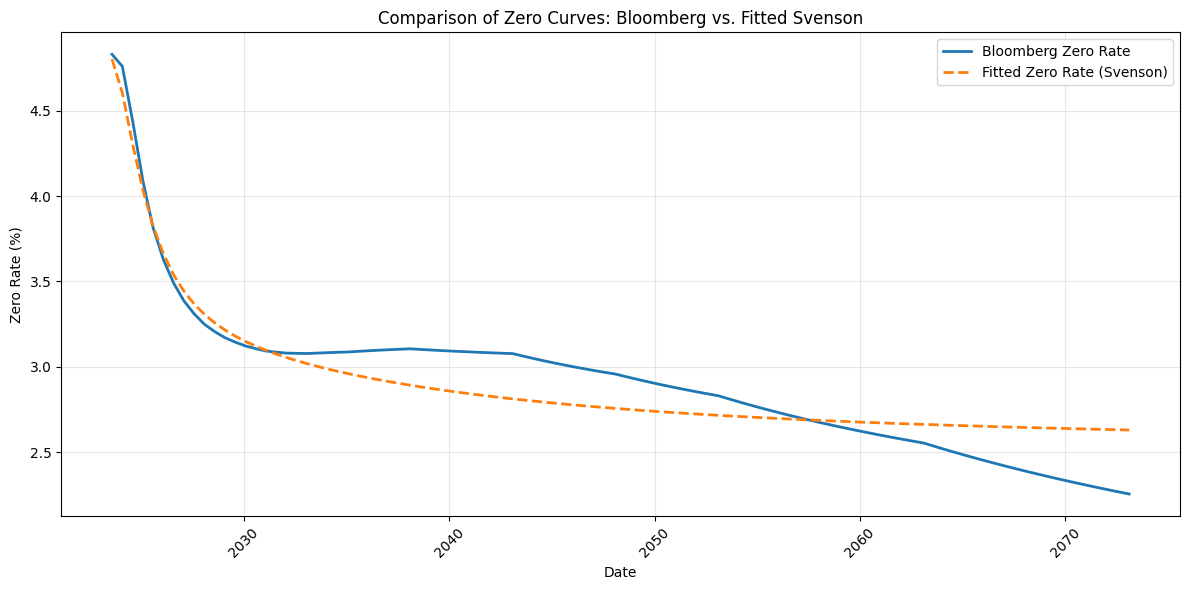

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(results_df['Date'], results_df['Bloomberg Zero Rate'], label='Bloomberg Zero Rate', linewidth=2)
plt.plot(results_df['Date'], results_df['My Zero Rate'], label='Fitted Zero Rate (Svenson)', linestyle='--', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Zero Rate (%)')
plt.title('Comparison of Zero Curves: Bloomberg vs. Fitted Svenson')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()